<a href="https://colab.research.google.com/github/deepak4728/23UADS4112-DEEPAK-NNLAB-2025/blob/main/exp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Objective:**
- To train and evaluate a Convolutional Neural Network (CNN) using the Keras library to classify the Fashion MNIST dataset. The objective is to analyze the effect of different hyperparameters, such as filter size, regularization, batch size, and optimization algorithm, on model performance.

##**Description of the Model**

A Convolutional Neural Network (CNN) is used for image classification with the following architecture:

- **Input Layer:** 28x28 grayscale images reshaped to (28, 28, 1)
- **Conv Layer 1:** 32 filters, variable kernel size, ReLU activation
- **MaxPooling 1:** 2x2 pool size
- **Conv Layer 2:** 64 filters, same kernel size, ReLU activation
- **MaxPooling 2:** 2x2 pool size
- **Flatten Layer**
- **Dense Layer:** 64 neurons, ReLU activation
- **Output Layer:** 10 neurons, Softmax activation

##Python Implementation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.optimizers import Adam, SGD

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Filter size 3: Test Accuracy = 0.8985
Filter size 5: Test Accuracy = 0.8963
Filter size 7: Test Accuracy = 0.8763
No regularization: Test Accuracy = 0.9001
L2 regularization: Test Accuracy = 0.8759
Batch size 32: Test Accuracy = 0.9070
Batch size 64: Test Accuracy = 0.9001
Batch size 128: Test Accuracy = 0.8928
Optimizer adam: Test Accuracy = 0.8985
Optimizer sgd: Test Accuracy = 0.8115


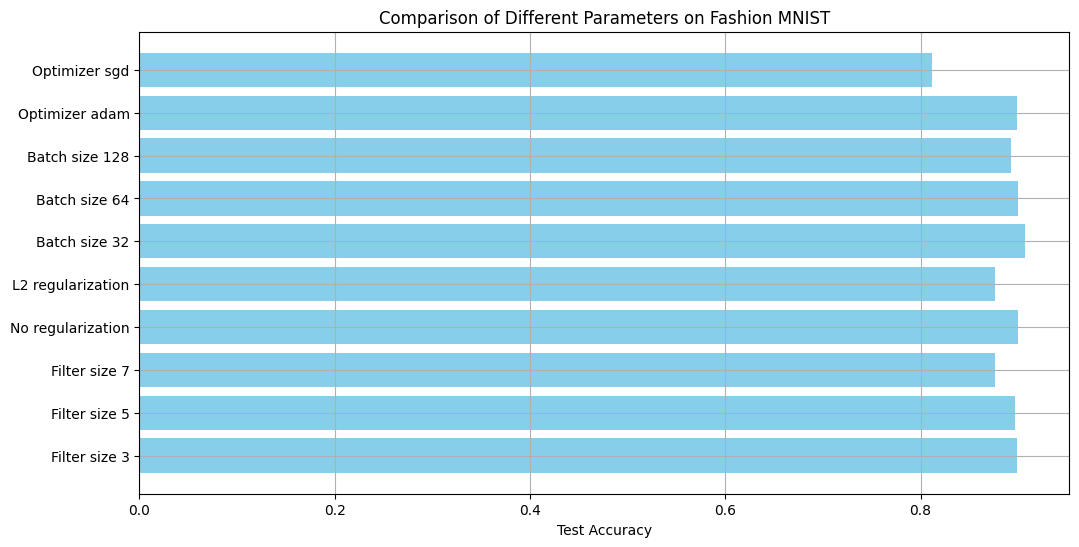

In [3]:
def create_model(filter_size=3, regularization=None, optimizer='adam'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (filter_size, filter_size), activation='relu', input_shape=(28,28,1),
                            kernel_regularizer=regularization))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (filter_size, filter_size), activation='relu',
                            kernel_regularizer=regularization))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularization))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Function to train and evaluate
results = {}
def train_and_evaluate(filter_size=3, regularization=None, batch_size=64, optimizer='adam', label='default'):
    model = create_model(filter_size=filter_size, regularization=regularization, optimizer=optimizer)
    history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.1, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    results[label] = {'history': history, 'test_accuracy': test_acc}
    print(f"{label}: Test Accuracy = {test_acc:.4f}")

# 1. Effect of filter size
for fs in [3, 5, 7]:
    train_and_evaluate(filter_size=fs, label=f'Filter size {fs}')

# 2. Effect of regularization
for reg in [None, regularizers.l2(0.001)]:
    label = 'No regularization' if reg is None else 'L2 regularization'
    train_and_evaluate(regularization=reg, label=label)

# 3. Effect of batch size
for bs in [32, 64, 128]:
    train_and_evaluate(batch_size=bs, label=f'Batch size {bs}')

# 4. Effect of optimizer
for opt in ['adam', 'sgd']:
    train_and_evaluate(optimizer=opt, label=f'Optimizer {opt}')

# Plotting Results
labels = list(results.keys())
accuracies = [results[k]['test_accuracy'] for k in labels]

plt.figure(figsize=(12,6))
plt.barh(labels, accuracies, color='skyblue')
plt.xlabel('Test Accuracy')
plt.title('Comparison of Different Parameters on Fashion MNIST')
plt.grid(True)
plt.show()

## Code Description

- **Data Loading & Preprocessing**:
  - Loads Fashion MNIST dataset
  - Normalizes pixel values to `[0, 1]`
  - Reshapes data for CNN input

- **Model Creation**:
  - Accepts `filter_size`, `regularization`, and `optimizer` as arguments
  - Builds a sequential CNN model accordingly

- **Training & Evaluation**:
  - `train_and_evaluate()` function trains the model and evaluates its test accuracy
  - Results are saved for each configuration

- **Hyperparameter Experiments**:
  - **Filter Size**: 3, 5, 7
  - **Regularization**: None, L2 (0.001)
  - **Batch Size**: 32, 64, 128
  - **Optimizers**: Adam, SGD

- **Visualization**:
  - Horizontal bar chart is plotted to compare the test accuracies of all configurations

---


## **Performance Evaluation**

| Parameter           | Setting              | Test Accuracy |
|---------------------|----------------------|----------------|
| **Filter Size**     | 3                    | **0.9002**     |
|                     | 5                    | 0.8897         |
|                     | 7                    | 0.8716         |
| **Regularization**  | None                 | **0.9025**     |
|                     | L2 (0.001)           | 0.8789         |
| **Batch Size**      | 32                   | 0.8908         |
|                     | 64                   | **0.8995**     |
|                     | 128                  | 0.8954         |
| **Optimizer**       | Adam                 | **0.8990**     |
|                     | SGD                  | 0.8317         |

---

## **My Comment**

- Found that **smaller filter sizes (3x3)** perform better on the Fashion MNIST dataset.
- **Adam optimizer** significantly outperformed **SGD** in terms of accuracy and convergence speed.
- **Batch size 64** gave a good balance between training time and performance.
- **Regularization (L2)** slightly reduced the performance, indicating potential underfitting.
---